<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

###  Feature Engineering, Regression, and Regularization

---

The application of machine learning to home pricing is a burgeoning field. Companies like OpenDoor are taking on the historically insular and unscientific real estate sales market by applying data science to better predict trends, detect patterns, and ultimately undercut the competition. 

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). The housing data available in this project has around 80 different variables cataloguing a wide variety of attributes for real estate properties. The target variable of interest is the sales price.

What has the most impact on the sales price of a house? Is just using square footage and building age sufficient, or are there other less obvious factors at play? You'll get to investigate what's important using EDA and regularized regression models, and practice model evaluation and cross-validation.

---

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `housing.csv` dataset

---

The csv is located in the `DSI-SF-4/datasets/housing_regression` folder in your repo. 

**There is a file describing the columns in the dataset in the `data_description.txt` file in the same folder that contains the information on what the variables represent.**


In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
house = pd.read_csv('/Users/tyronewilliams/Desktop/DSI-SF-4/datasets/housing_regression/housing.csv')
house.columns


Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Examine the `SalePrice` variable

---

### 2.1 Plot the distribution of the `SalesPrice` variable and describe it with pandas

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

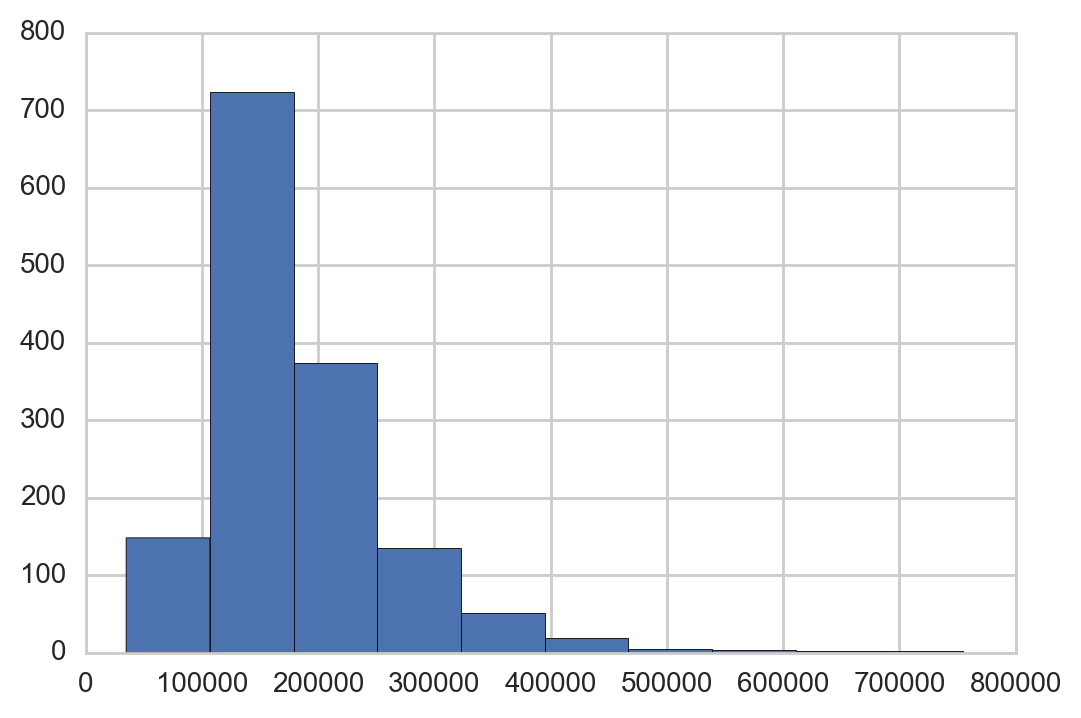

In [3]:
plt.hist(house["SalePrice"])
house["SalePrice"].describe()

### 2.2 Create a transformed version of the `SalesPrice` variable that makes it more normally distributed

Two common transformations to deal with long tails are taking the square root and taking the log of a variable. 

Plot the transformed variable.

1.8828757597682129

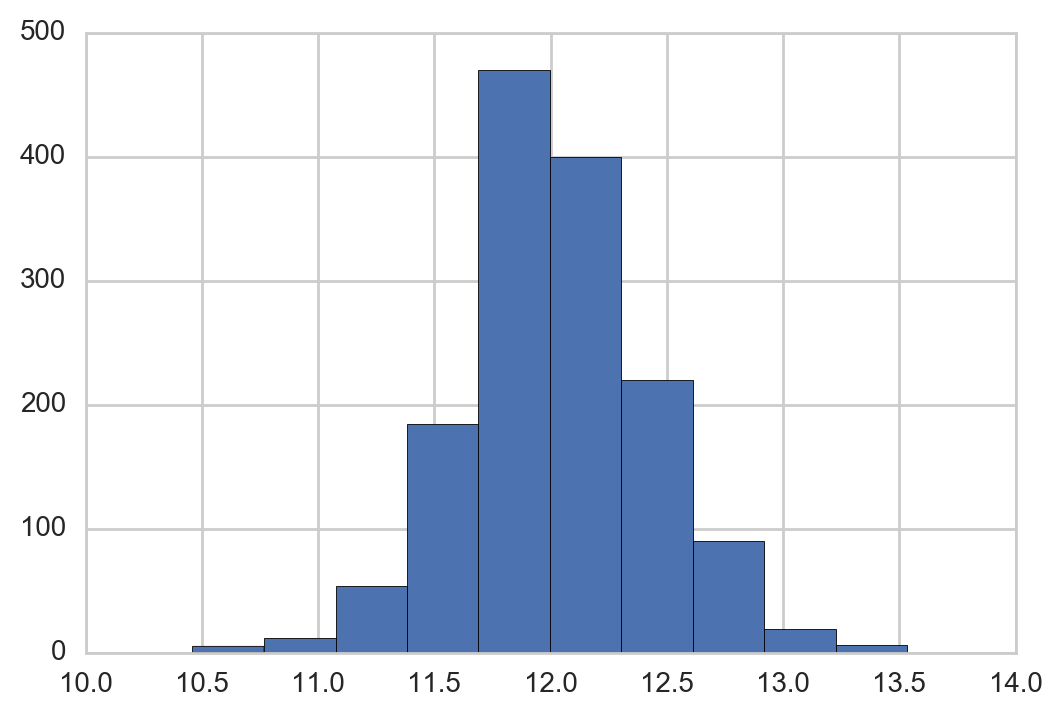

In [4]:
#log variable

house["log_price"] = np.log(house["SalePrice"])
plt.hist(house["log_price"])
house["SalePrice"].skew()

(array([ 148.,  723.,  373.,  135.,   51.,   19.,    4.,    3.,    2.,    2.]),
 array([-1.83870376, -0.93195144, -0.02519913,  0.88155319,  1.78830551,
         2.69505783,  3.60181015,  4.50856246,  5.41531478,  6.3220671 ,
         7.22881942]),
 <a list of 10 Patch objects>)

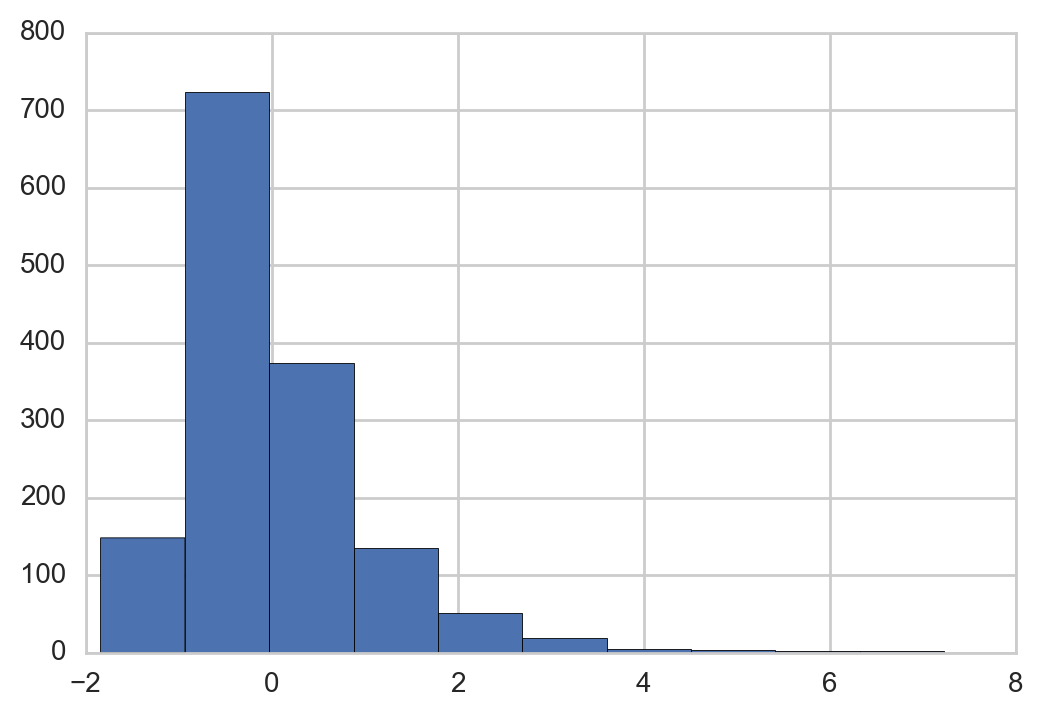

In [5]:
#standardized variables

house_mean = np.mean(house["SalePrice"])
house_std = np.std(house["SalePrice"])
house["normal_price"] = (house["SalePrice"] - house_mean)/house_std
plt.hist(house["normal_price"])

(array([ 148.,  723.,  373.,  135.,   51.,   19.,    4.,    3.,    2.,    2.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

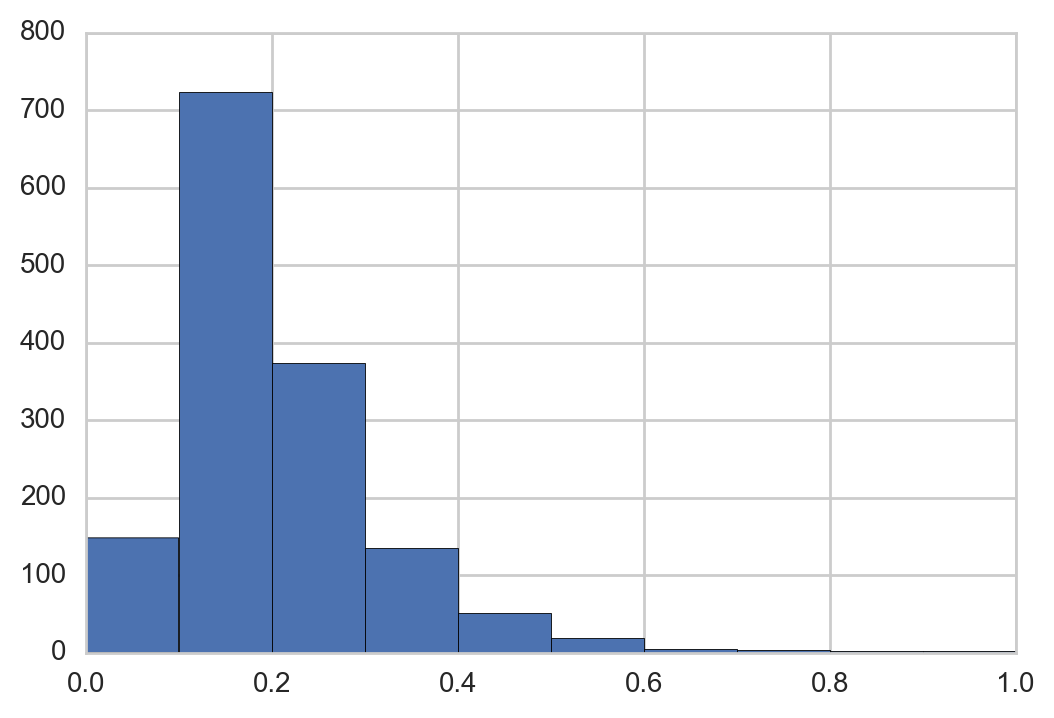

In [6]:
house_min = np.min(house["SalePrice"])
house_max= np.max(house["SalePrice"])
house["normal_max_price"] = (house["SalePrice"] - house_min)/(house_max- house_min)
plt.hist(house["normal_max_price"])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Correlations with sale price

---

### 3.1 Correlate the age of a house when sold with the sale price

How is the correlation different when using the original and transformed sale price?


In [7]:
house["age_sold"] = house["YrSold"]- house["YearBuilt"]
np.corrcoef(house.age_sold, house.SalePrice)

array([[ 1.        , -0.52335042],
       [-0.52335042,  1.        ]])

In [336]:
np.corrcoef(house.age_sold, house.log_price)

array([[ 1.        , -0.58729005],
       [-0.58729005,  1.        ]])

### 3.1 
Correlation coeffecients do not change

### 3.2 Plot the age of the house at sale against the sale price variables

How does it differ between the original and transformed variables? What do the charts indicate about the relationship between the variables?

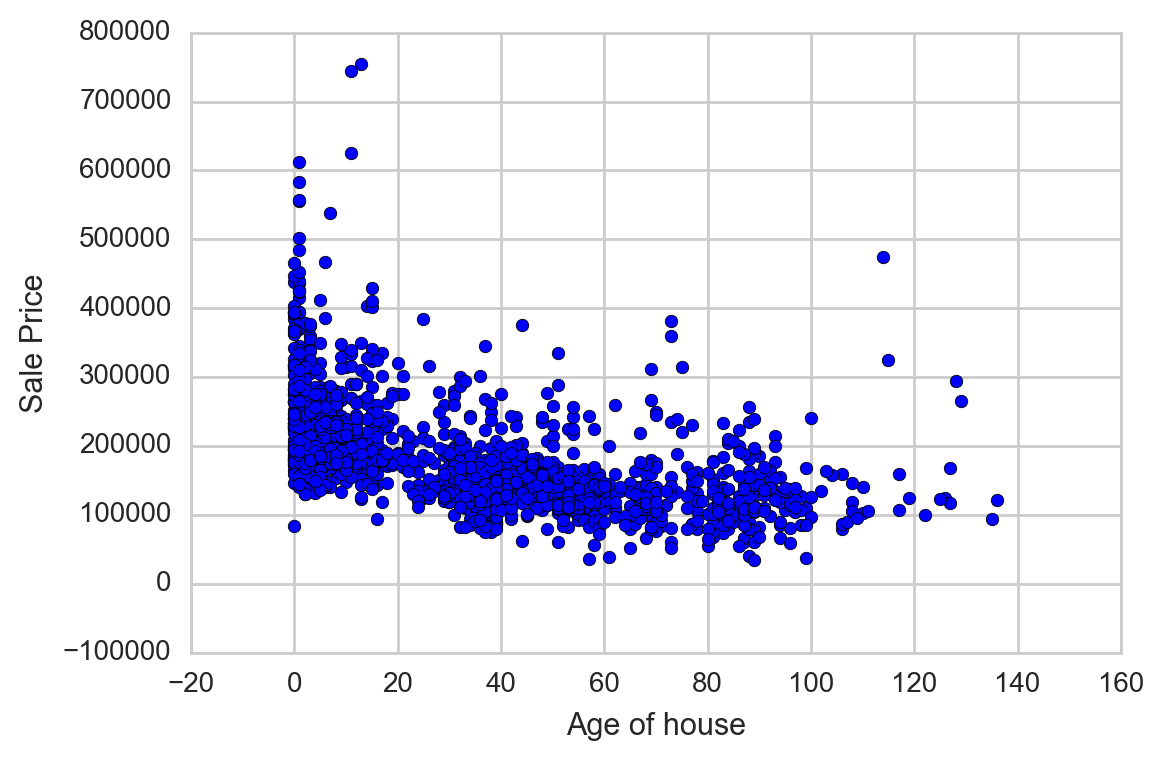

In [8]:
plt.scatter(house.age_sold, house.SalePrice)
plt.xlabel('Age of house')
plt.ylabel('Sale Price')

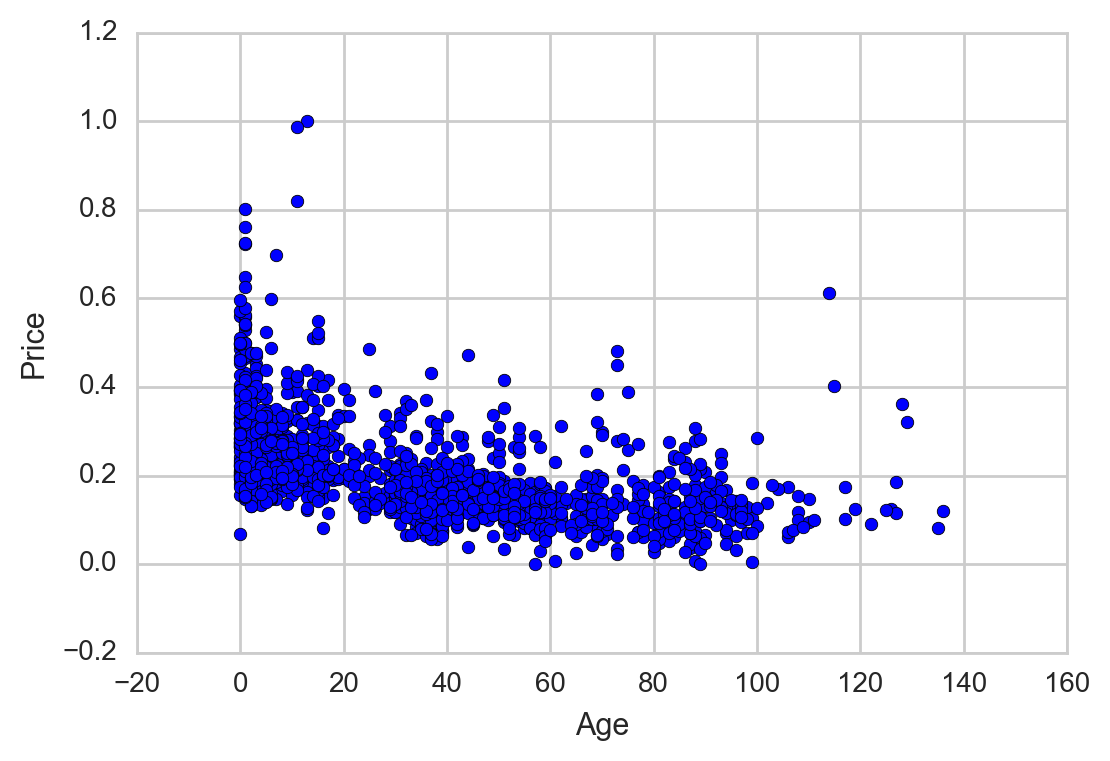

In [9]:
plt.scatter(house.age_sold, house.normal_max_price)
plt.xlabel('Age')
plt.ylabel('Price')

### 3.2
The relationship between the variables indicates that they remain the same regardless of the transformation

### 3.3 Visually compare price to total livable square feet, `GrLivArea`

What is the relationship, if any?

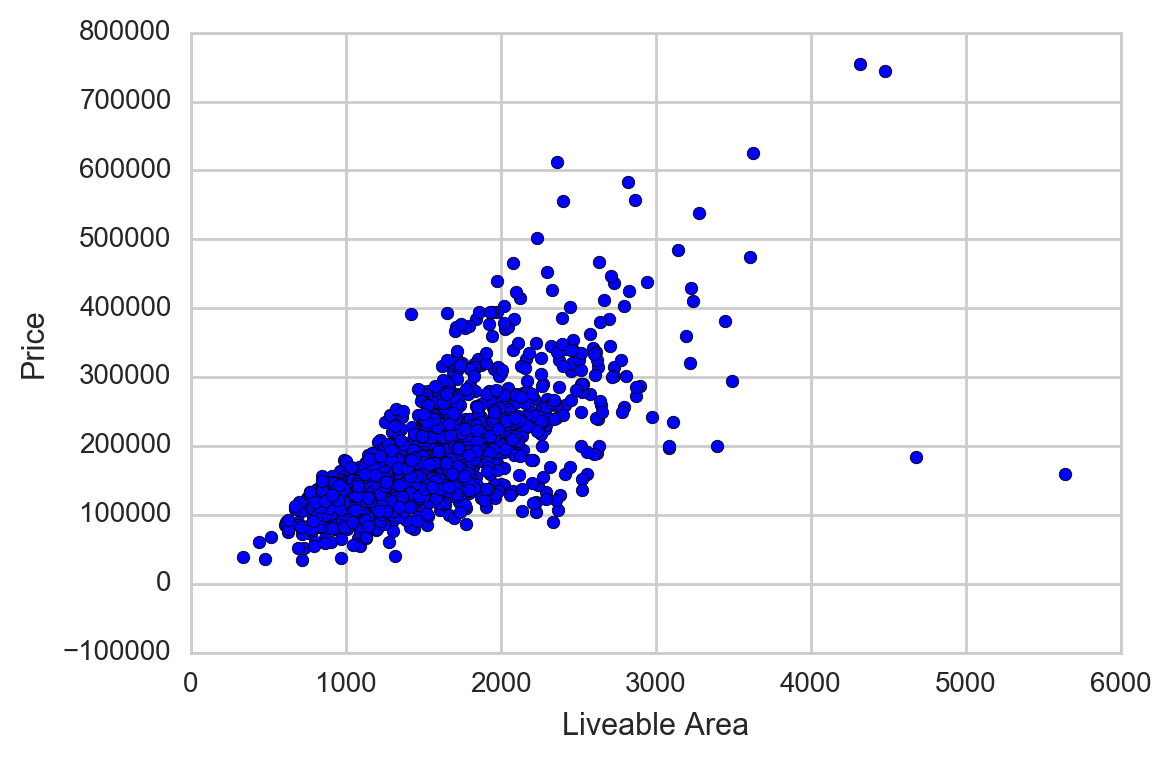

In [10]:
plt.scatter(house.GrLivArea, house.SalePrice)
plt.xlabel('Liveable Area')
plt.ylabel('Price')

### 3.3
The chart seems to indicate that as square foot increases, so does price. This seems like a reasonable relationship and makes sense, as bigger homes tend to go for higher prices

In [11]:
house["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

### 3.4 Plot and describe the relationship between two continuous variables of your choice in the data

Why did you choose those variables? What is the relationship that the chart sbows, if any?

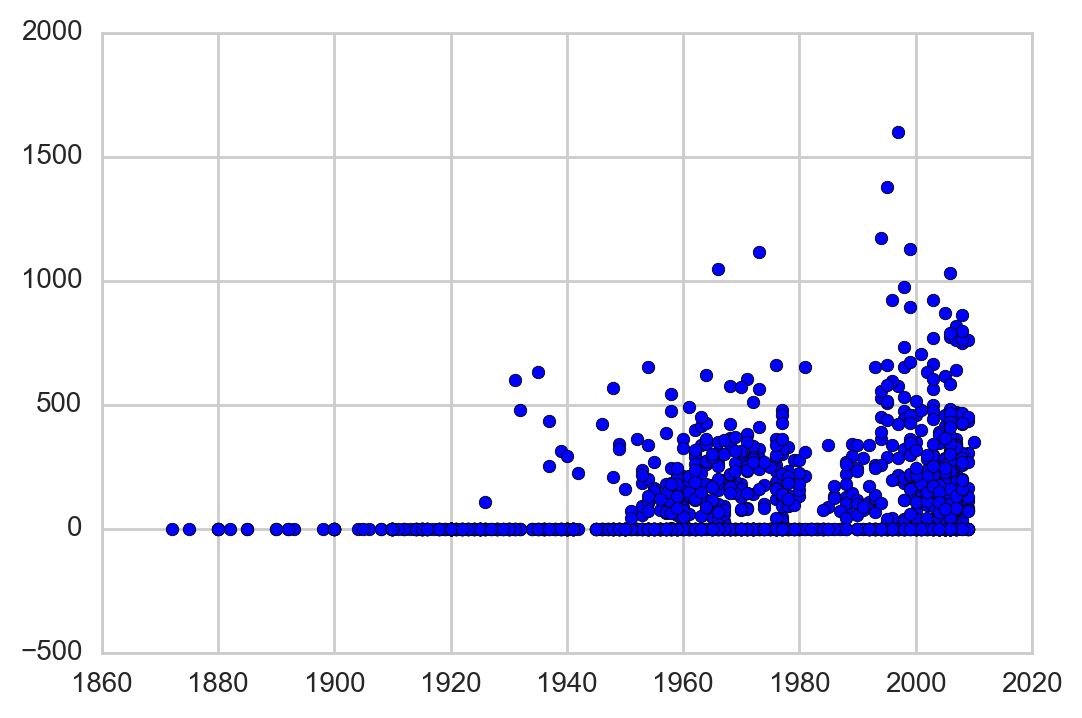

In [12]:
plt.scatter(house.YearBuilt, house.MasVnrArea)

Choose this relationship to see that if homes tended to get smaller or bigger over time

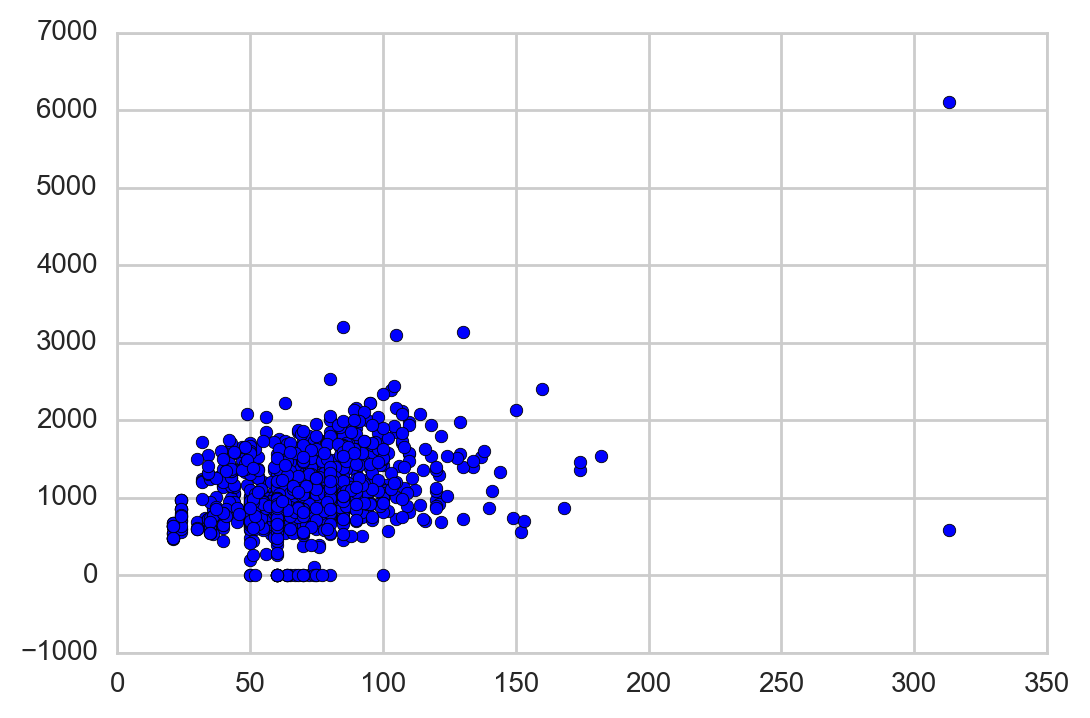

In [13]:
plt.scatter(house.LotFrontage, house.TotalBsmtSF)

Just wanted to see if people tended ot build bigger basements given theyhave higher lot frontage

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Data transformation and quality assessment

---

**Note: from this point onward, you can use your transformed price variable or the original price variable. Up to you. It will change the interpretation of the coefficients in your model.**

### 4.1 Restrict the data 

Only keep houses that are residential (remove the commercial code buildings).

In [14]:
df = house[house["MSZoning"].isin(("RM","RL","RH"))]



### 4.2 Handle null values in the dataset

Many of the variables contain null values. In many of these cases the null value is actually representative of a category that is a level of a categorical variable.

Eliminate the null values from your dataset, explaining your rationale for each variable. You have options for null values:

- Replace the null values (impute).
- Drop the observation.
- Drop the variable. 

In [15]:

df["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [16]:
df.shape

(1385, 85)

In [ ]:
#I drop all these variables later with the code given below. 
#The reason for droping most of them is that they had way to high of a count of NaN values

# data1 = df.iloc[:, 0:80]
# data1 = data1.drop("3SsnPorch", 1)
# data1= data1.drop("Alley", 1)
# data1 = data1.drop("PoolQC", 1)
# data1 = data1.drop("MiscFeature", 1)
# data1 = data1.drop("Fence", 1)
# data1 = data1.drop("FireplaceQu", 1)



### 4.3 Remove any variables you think are not viable to use as predictors of price.

This can be a subjective process. A common criterion is to remove variables that have little to no variance. This would be, for example, a  variable where nearly all observations were in a single category or had a single value. 

For each variable you remove (if any), explain your rationale for why.

In [17]:
df_corr = df.corr()
df_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,log_price,normal_price,normal_max_price,age_sold
Id,1.000000,0.009093,-0.004304,-0.033817,-0.032218,0.009935,-0.014949,-0.019282,-0.037687,-0.004410,...,0.004532,0.058113,-0.007461,0.035607,0.001618,-0.019420,-0.017146,-0.019420,-0.019420,0.014998
MSSubClass,0.009093,1.000000,-0.350828,-0.116667,0.010631,-0.046885,-0.008138,0.005391,-0.003110,-0.068126,...,-0.021542,0.011508,-0.004150,0.001817,-0.015370,-0.085592,-0.085477,-0.085592,-0.085592,0.007444
LotFrontage,-0.004304,-0.350828,1.000000,0.414296,0.280018,-0.070551,0.154711,0.111608,0.231824,0.244698,...,0.038080,0.210903,-0.004703,-0.001353,0.000636,0.357529,0.371606,0.357529,0.357529,-0.154460
LotArea,-0.033817,-0.116667,0.414296,1.000000,0.120835,-0.015650,0.033334,0.030755,0.120932,0.216267,...,0.039761,0.076847,0.036094,-0.002413,-0.014925,0.270955,0.270910,0.270955,0.270955,-0.033946
OverallQual,-0.032218,0.010631,0.280018,0.120835,1.000000,-0.091828,0.554148,0.531796,0.445808,0.249765,...,0.073138,0.069224,-0.028311,0.078726,-0.027897,0.790986,0.816953,0.790986,0.790986,-0.554552
OverallCond,0.009935,-0.046885,-0.070551,-0.015650,-0.091828,1.000000,-0.378201,0.092515,-0.136758,-0.059566,...,0.048815,-0.004058,0.068407,0.002987,0.048508,-0.081196,-0.045004,-0.081196,-0.081196,0.379785
YearBuilt,-0.014949,-0.008138,0.154711,0.033334,0.554148,-0.378201,1.000000,0.568667,0.336090,0.274446,...,-0.041015,0.008031,-0.031099,0.017647,-0.011708,0.517466,0.578645,0.517466,0.517466,-0.999013
YearRemodAdd,-0.019282,0.005391,0.111608,0.030755,0.531796,0.092515,0.568667,1.000000,0.188540,0.141211,...,-0.032639,0.008568,-0.005911,0.023294,0.039921,0.499208,0.553298,0.499208,0.499208,-0.566038
MasVnrArea,-0.037687,-0.003110,0.231824,0.120932,0.445808,-0.136758,0.336090,0.188540,1.000000,0.276358,...,0.046461,0.012860,-0.030787,-0.005674,-0.007755,0.512999,0.464013,0.512999,0.512999,-0.335911
BsmtFinSF1,-0.004410,-0.068126,0.244698,0.216267,0.249765,-0.059566,0.274446,0.141211,0.276358,1.000000,...,0.056660,0.142202,0.003120,-0.013594,0.011764,0.394510,0.384326,0.394510,0.394510,-0.273511


In [18]:
#drop (MSSubClass, Overallcond, BSMFin, LowqualfinSF,bsmthalf, enclosedporch, poolarea, Miscval, mosold, yr sold)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Plot a correlation matrix between the continuous variables

---

**Some columns in the DataFrame are numeric type, but that doesn't necessarily mean that they are continuous. Sometimes numeric values are used to represent the levels of a categorical variable.**

To plot a correlation matrix, it is popular to represent the correlation values using hue with a "heatmap". Look up how to plot a heatmap of a correlation matrix in python and show it below. Make sure that the variable labels are clear on the axes.

Describe anything interesting or notable you observe from the correlation matrix.

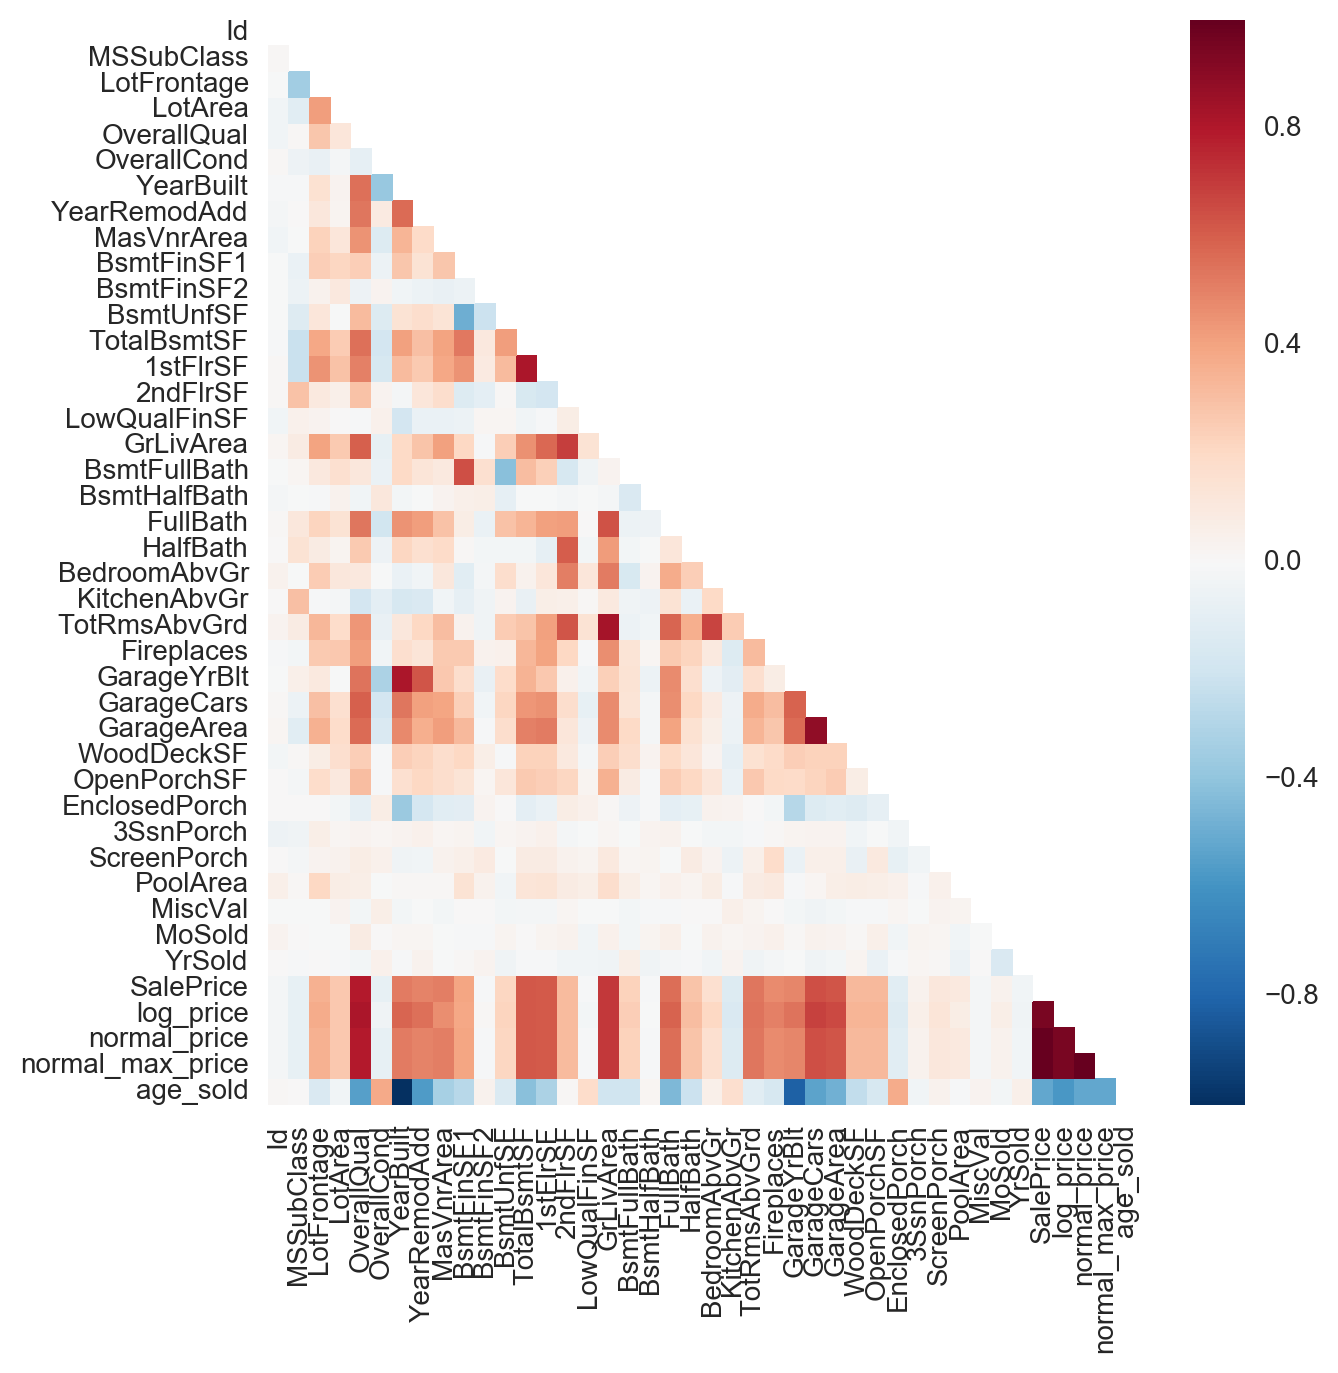

In [19]:
# Set the default matplotlib figure size to 7x7:
plt.rcParams['figure.figsize']=(7,7)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(df_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Make boxplots of categorical variables against the sale price

---

You don't have to plot all of them unless you want to. Make at least 8 boxplots looking at the distribution of sale price across levels of categorical variables in your dataset. This can be whichever categorical variables interest you the most.

Write up a few findings on the relationship between sales price and the categorical variables you chose to plot. Anything surprising?

In [341]:
import seaborn as sn

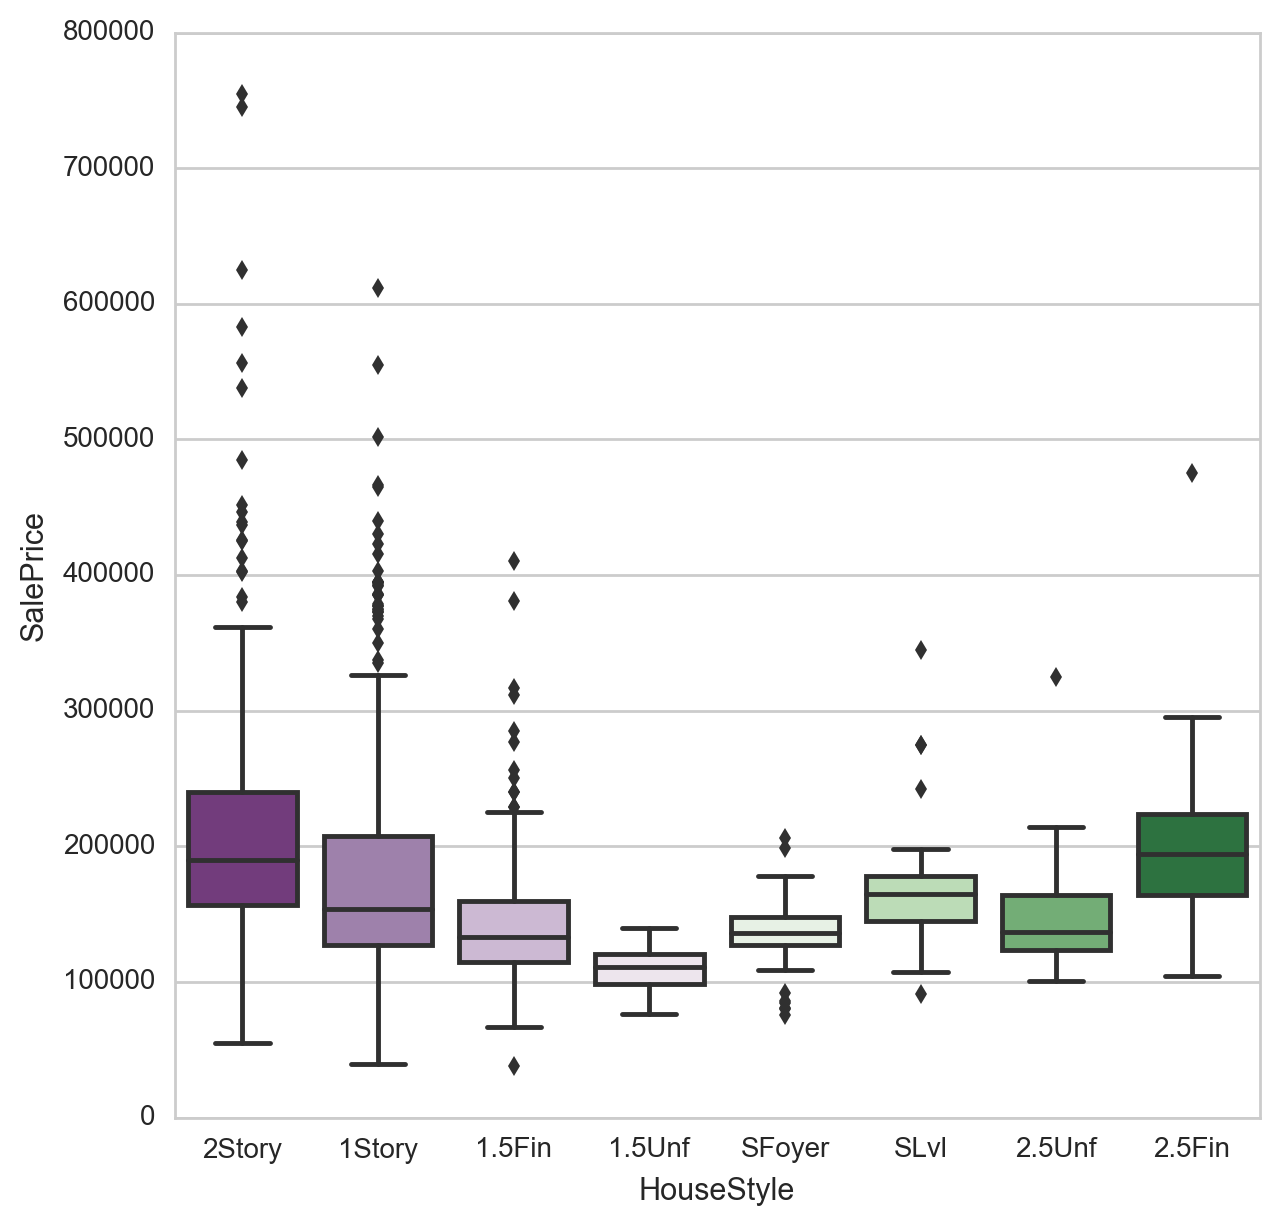

In [343]:
sns.boxplot(x=df.HouseStyle, y=df.SalePrice, data=df, palette="PRGn")

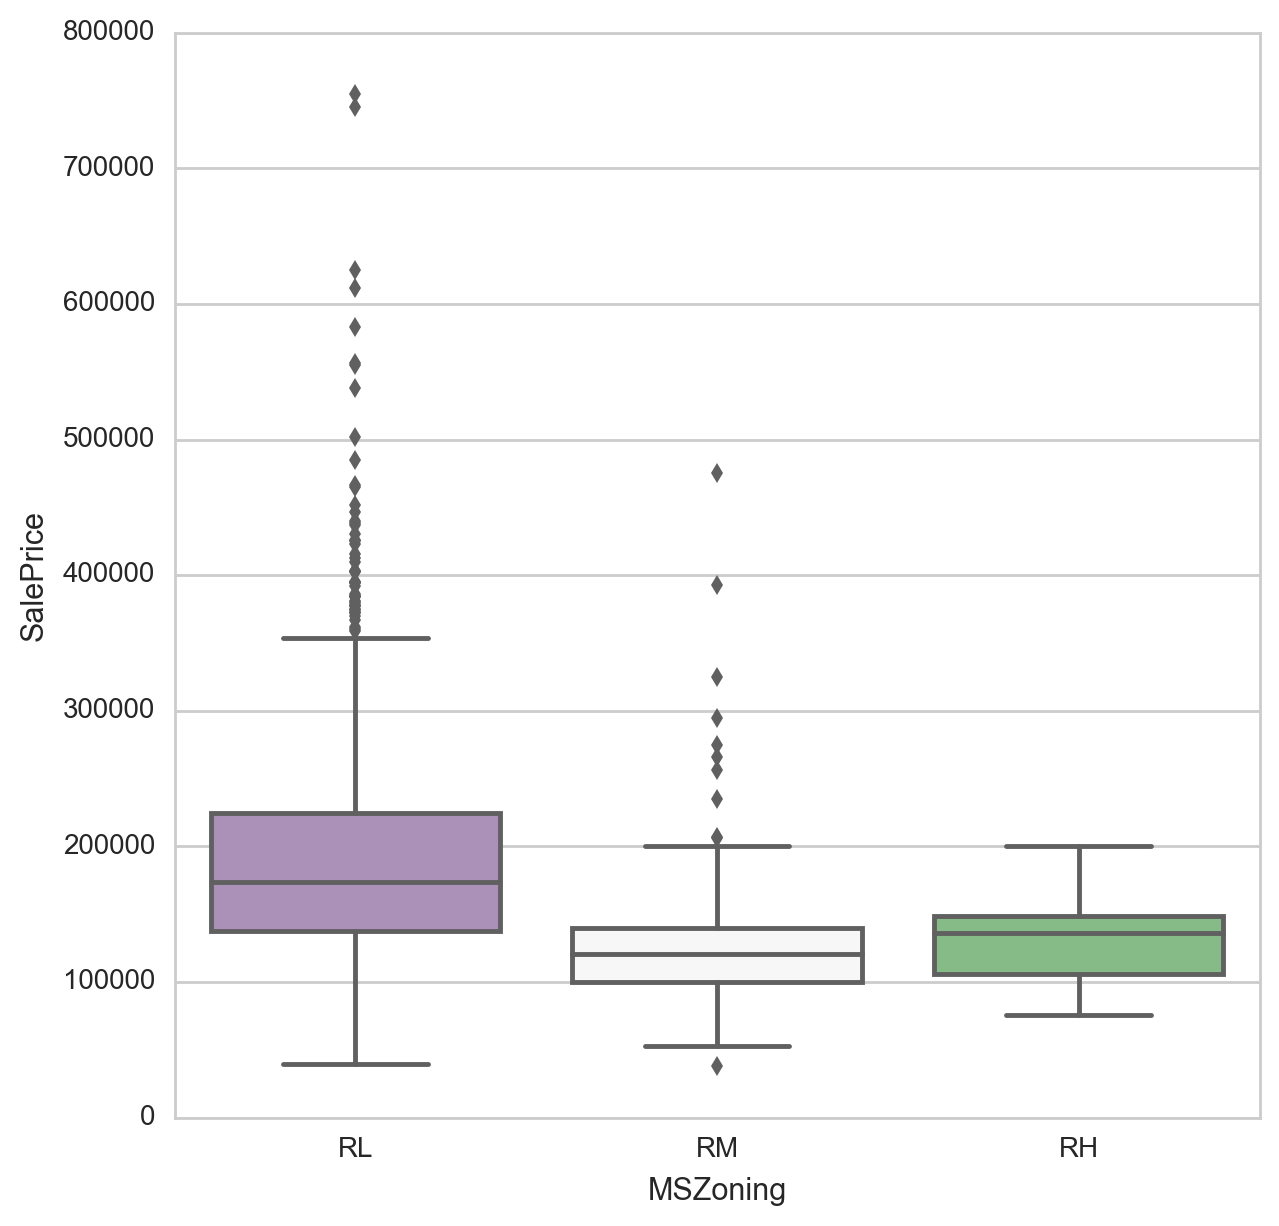

In [345]:
sns.boxplot(x=df.MSZoning, y=df.SalePrice, data=df, palette="PRGn")

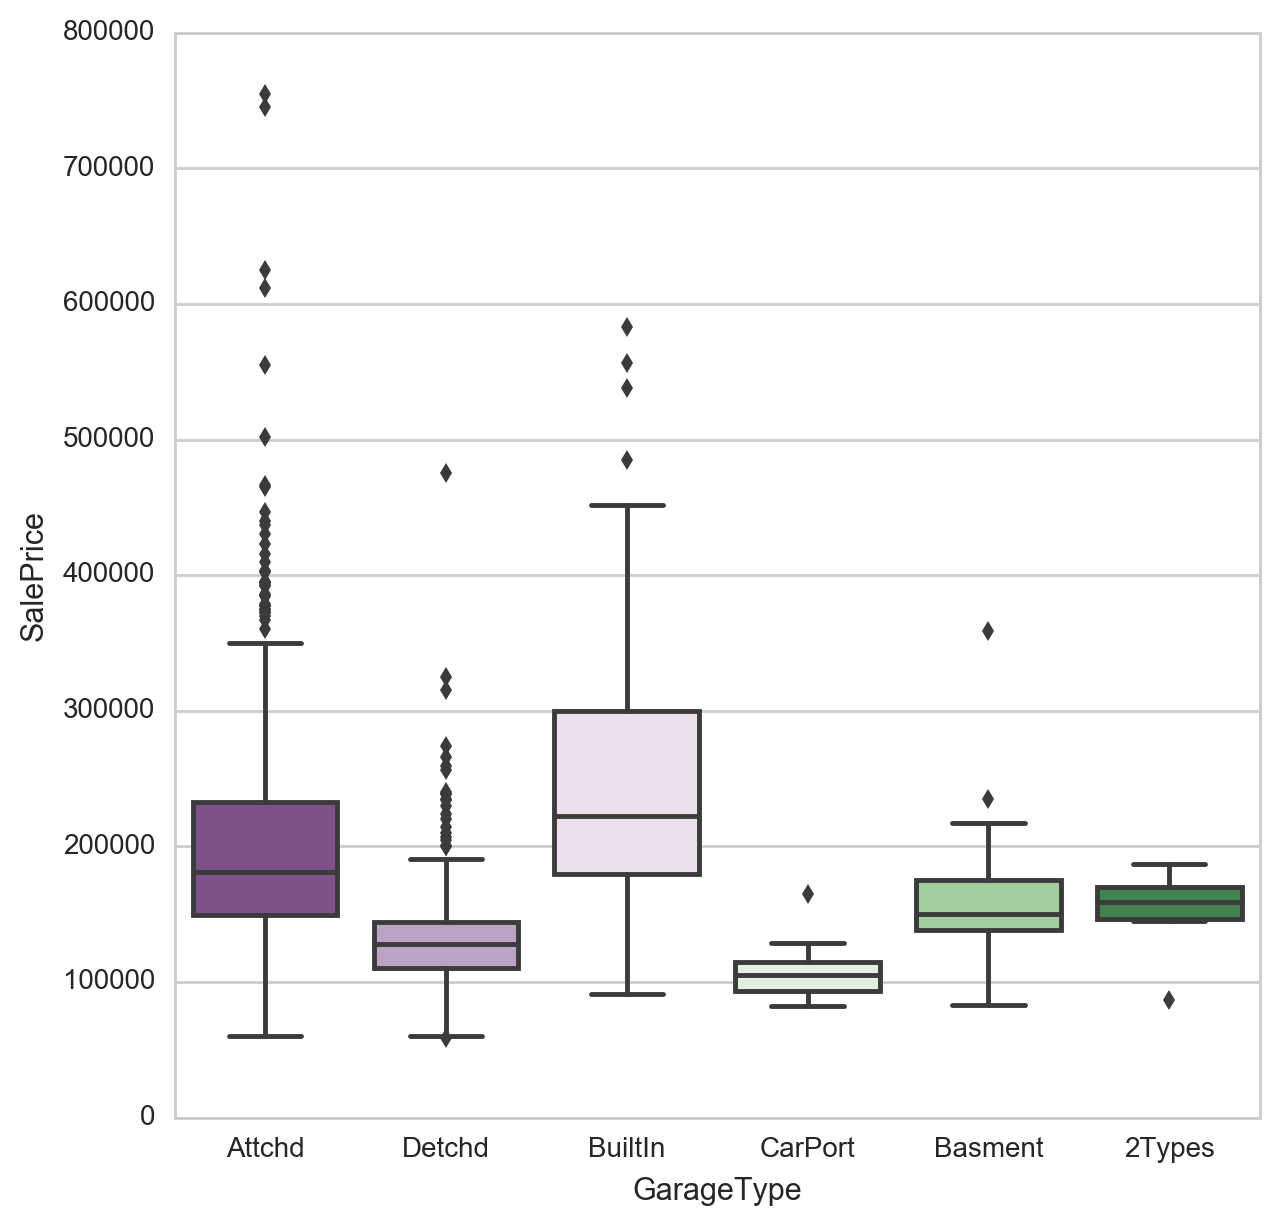

In [347]:
sns.boxplot(x=df.GarageType, y=df.SalePrice, data=df, palette="PRGn")

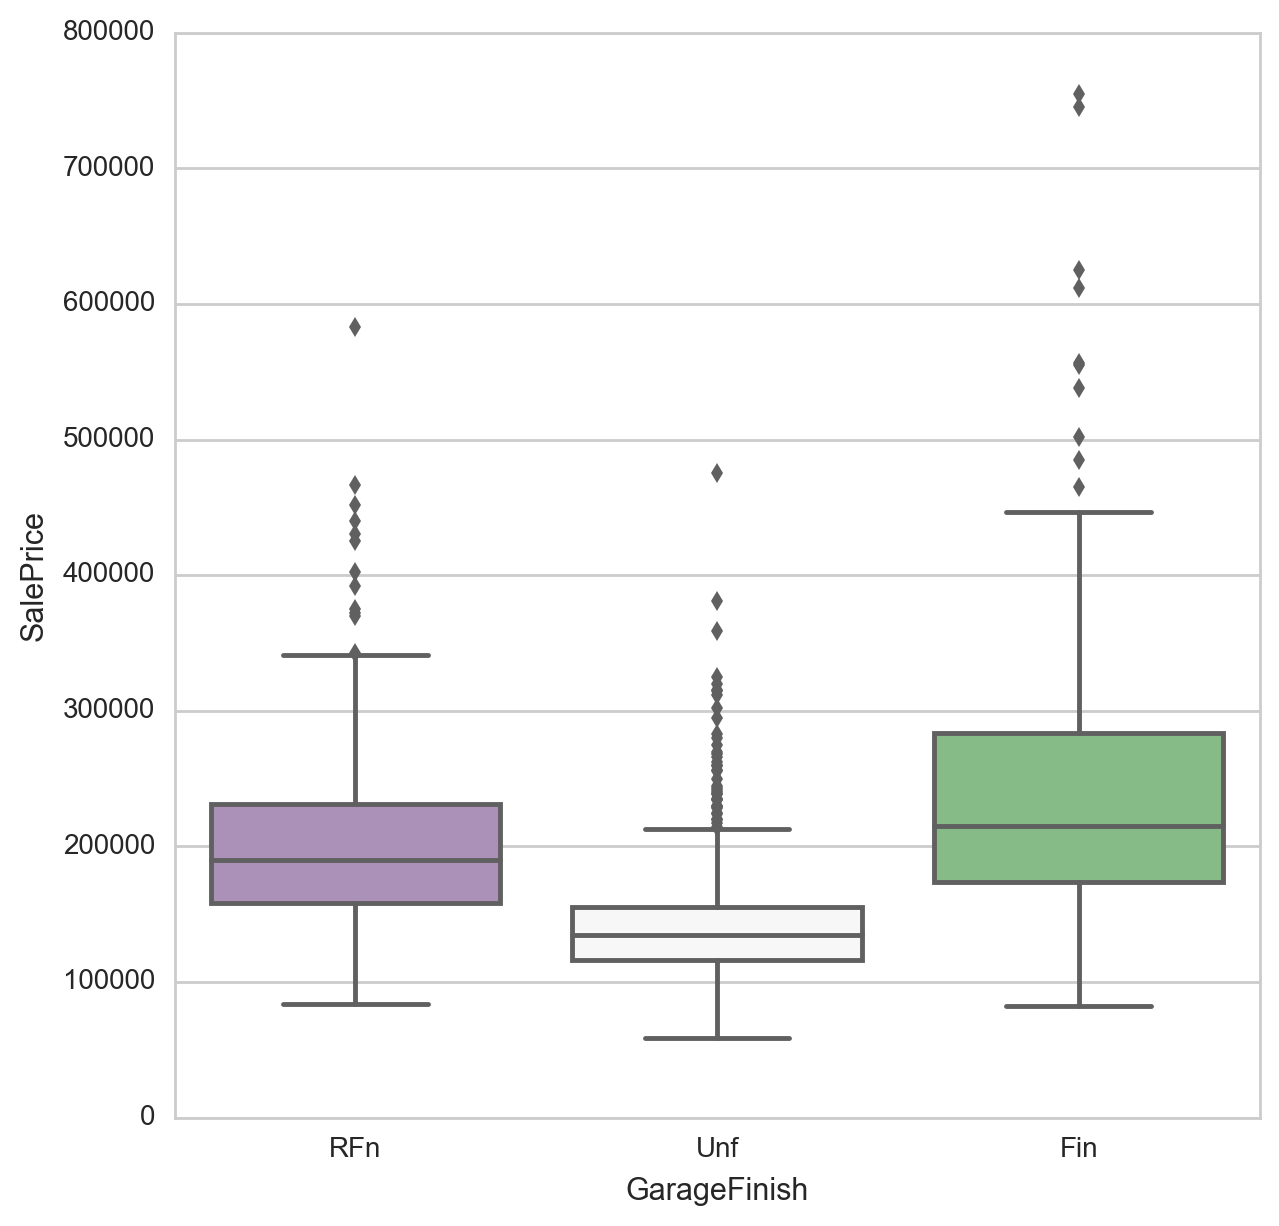

In [348]:
sns.boxplot(x=df.GarageFinish, y=df.SalePrice, data=df, palette="PRGn")

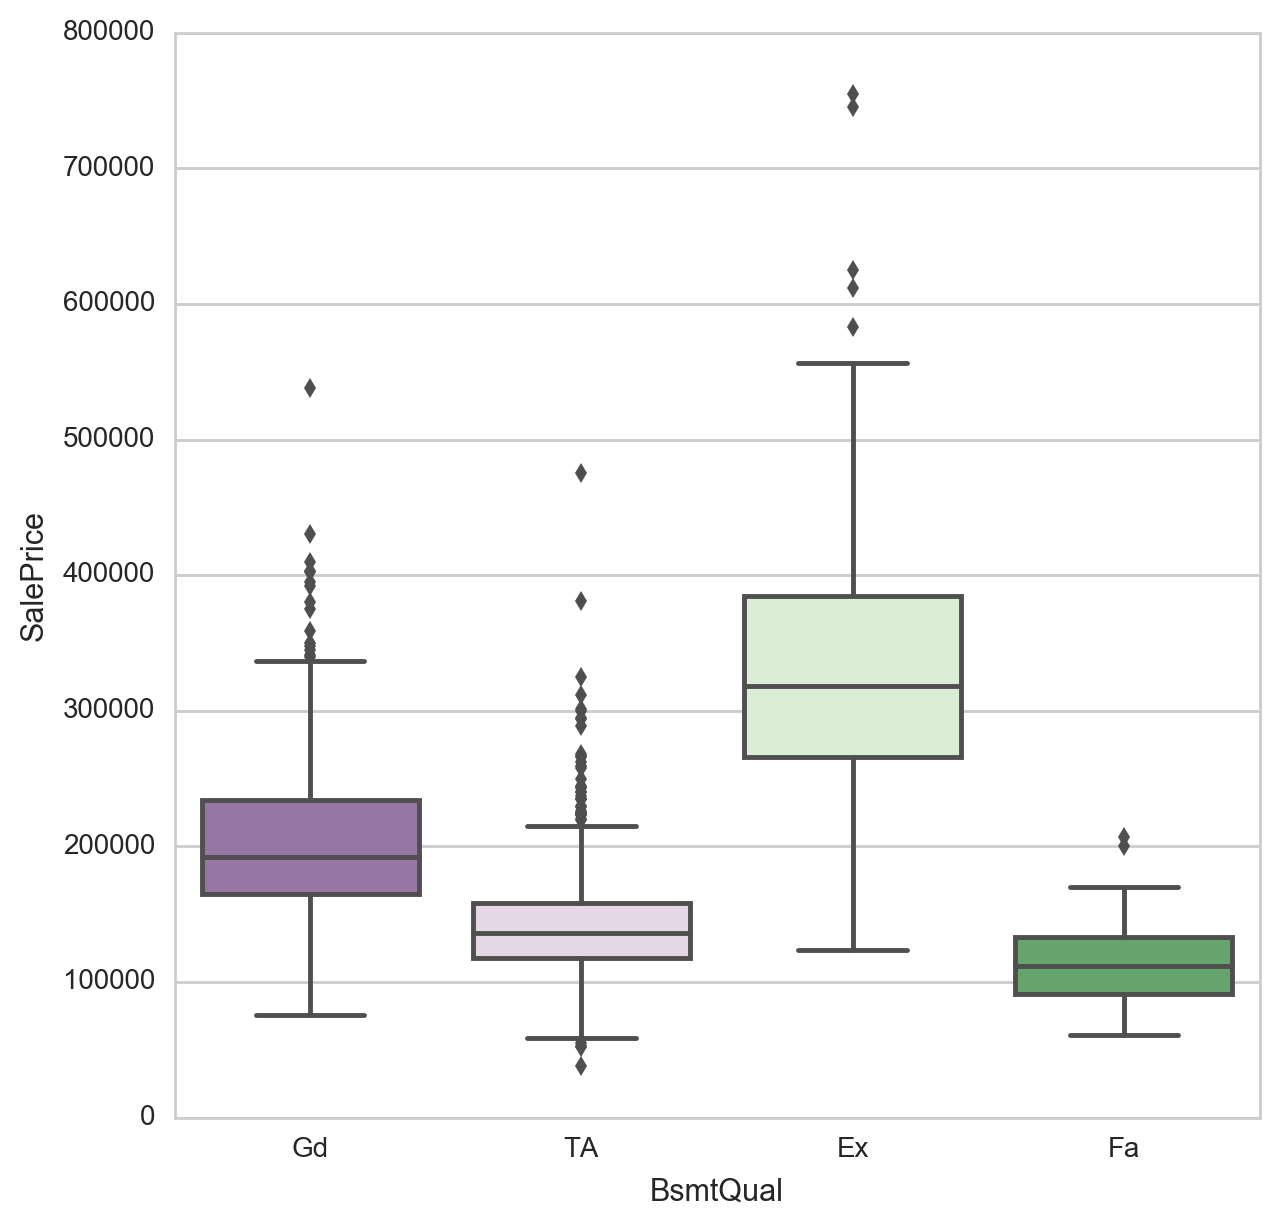

In [349]:
sns.boxplot(x=df.BsmtQual, y=df.SalePrice, data=df, palette="PRGn")

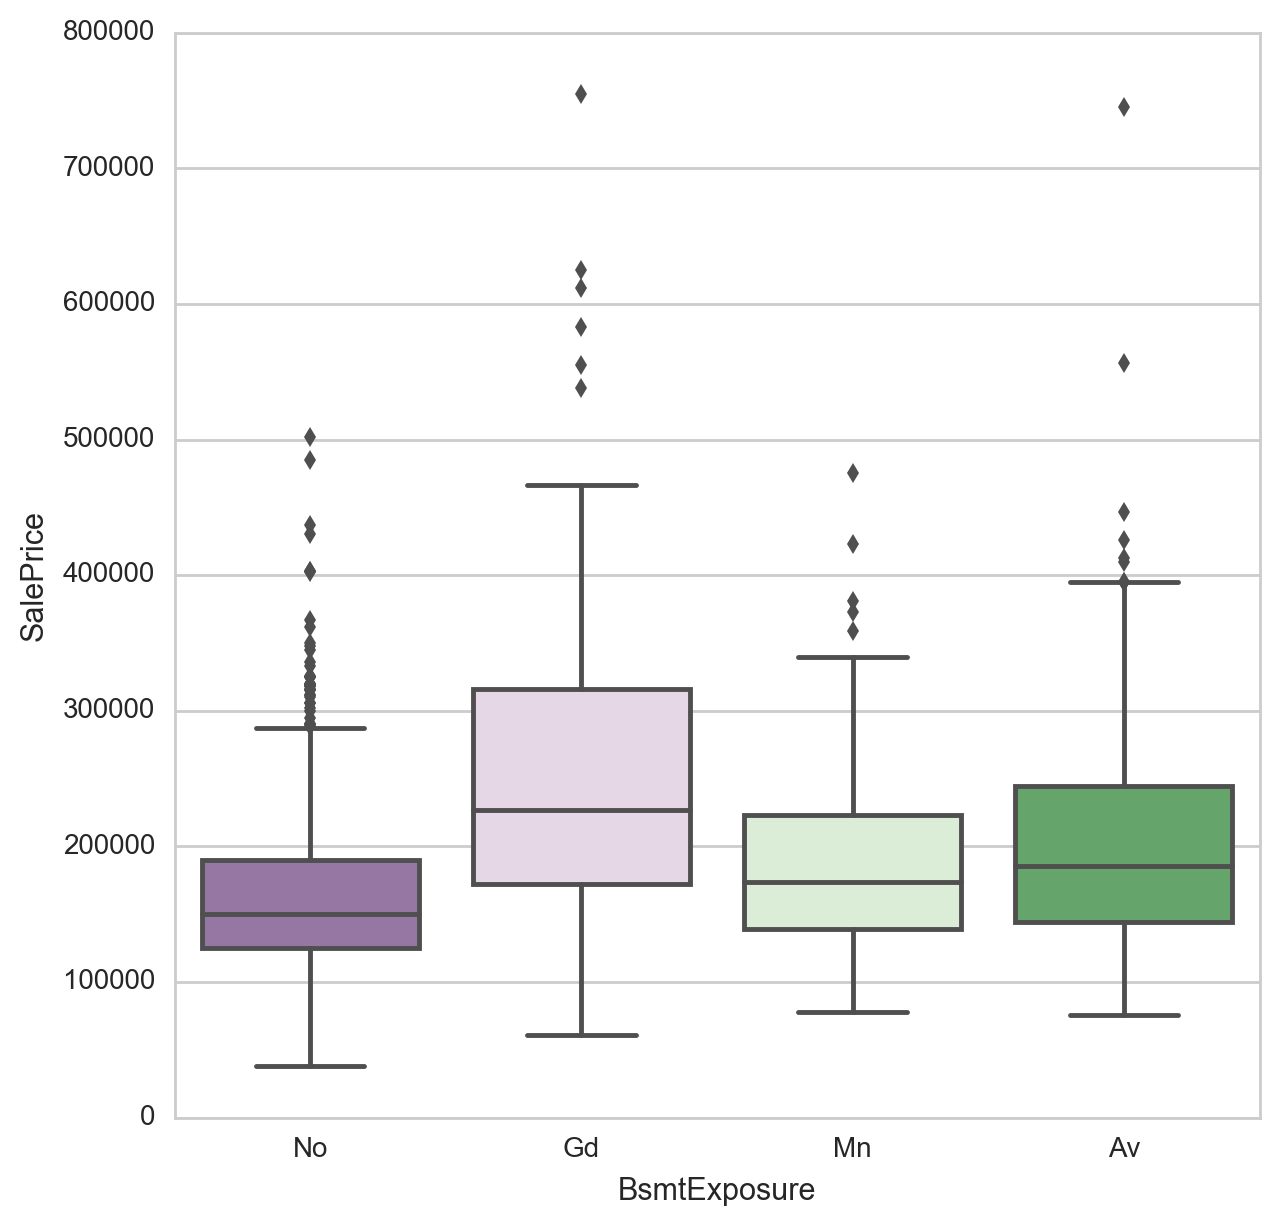

In [350]:
sns.boxplot(x=df.BsmtExposure, y=df.SalePrice, data=df, palette="PRGn")

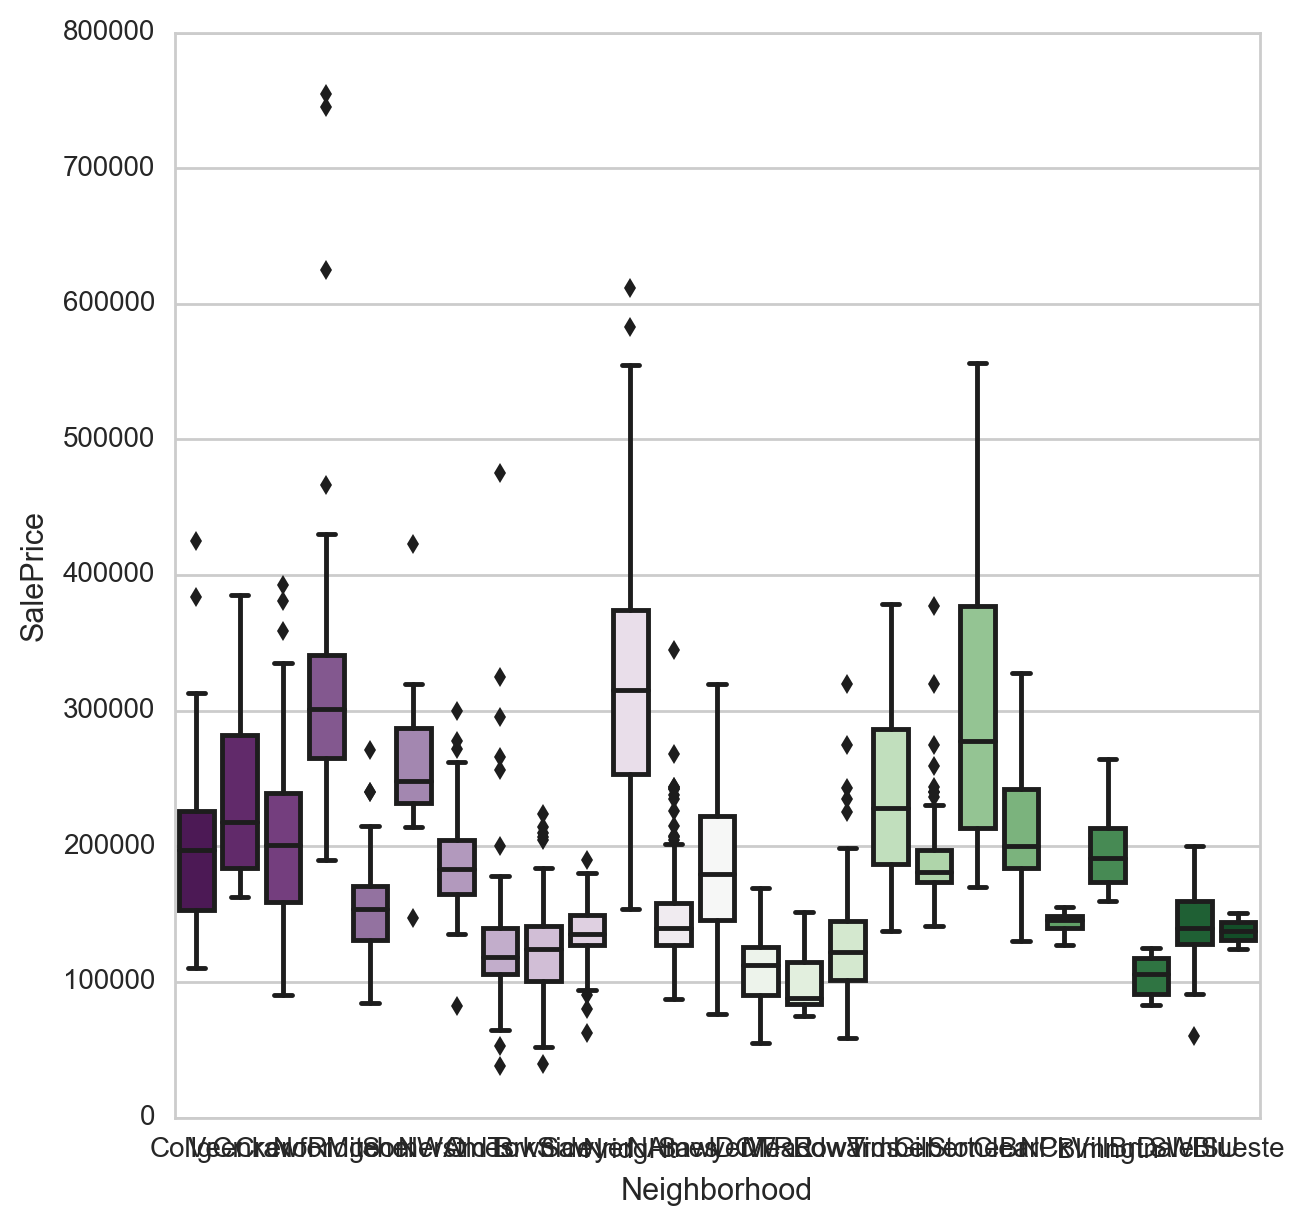

In [351]:
sns.boxplot(x=df.Neighborhood, y=df.SalePrice, data=df, palette="PRGn")

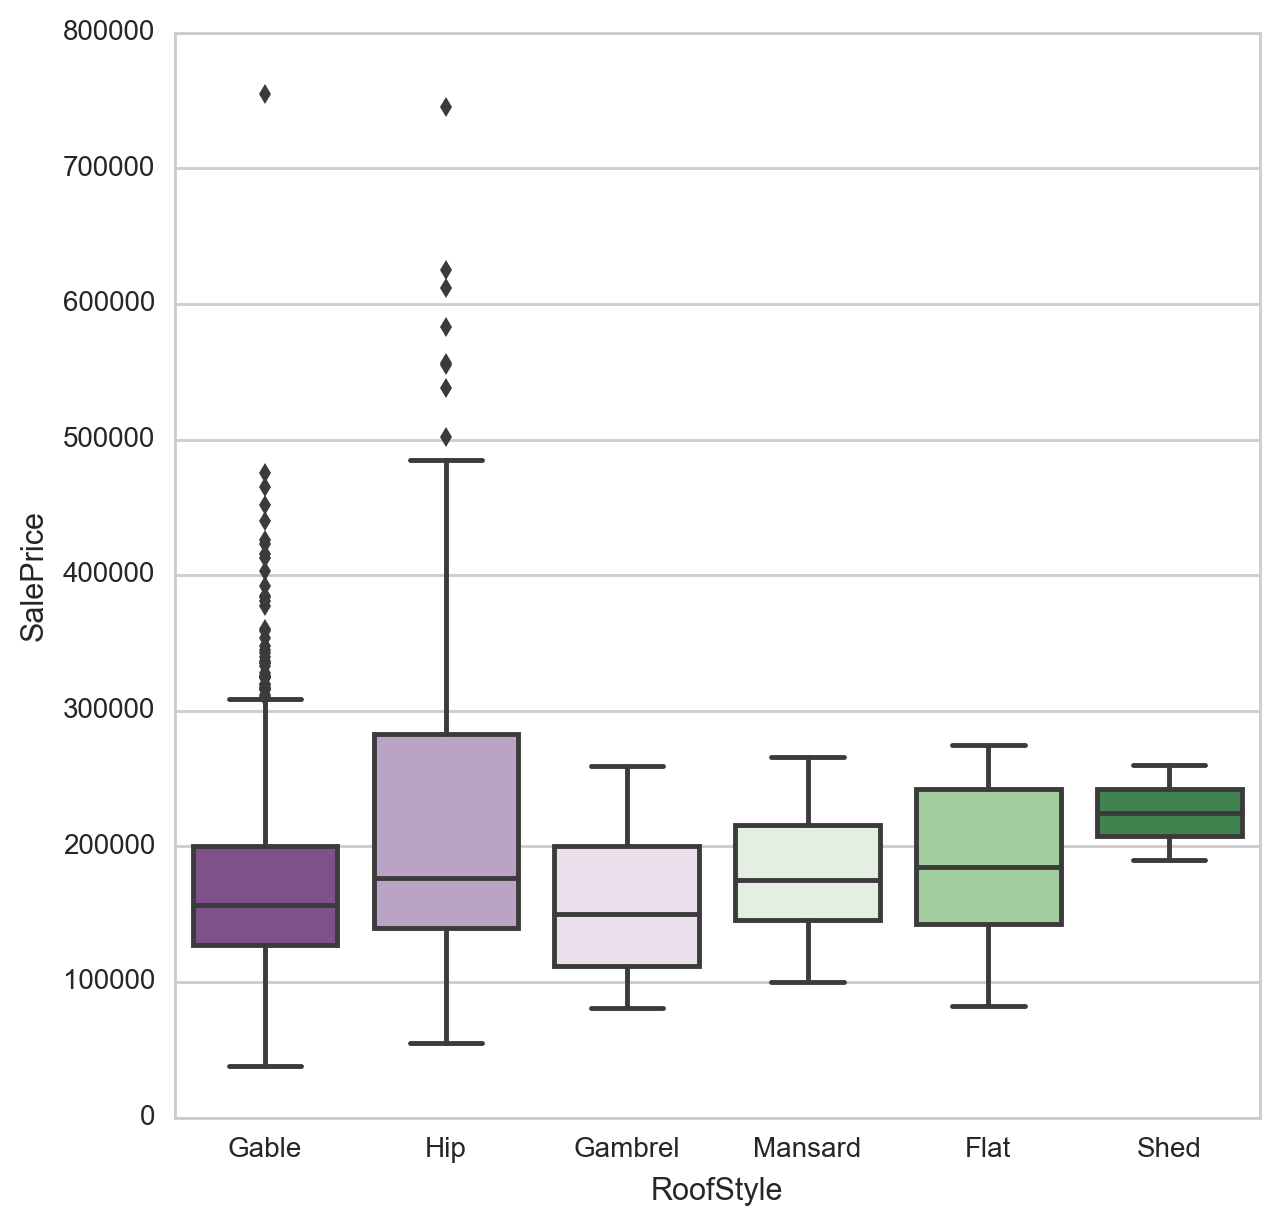

In [352]:
sns.boxplot(x=df.RoofStyle, y=df.SalePrice, data=df, palette="PRGn")

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Univariate regression predicting price with statsmodels

---

### 7.1 Build a linear regression with statsmodels predicting sales price from total living area sq ft.

Print the results of the regression.


In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from patsy import dmatrices


In [331]:

lm = linear_model.LinearRegression()


y, X = dmatrices("SalePrice ~GrLivArea", data= df , return_type="dataframe")



In [332]:
mod = sm.OLS(y,X).fit()

mod.params


Intercept    19135.802323
GrLivArea      106.268767
dtype: float64

In [333]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1394.
Date:                Sun, 04 Dec 2016   Prob (F-statistic):          1.36e-211
Time:                        20:56:14   Log-Likelihood:                -17117.
No. Observations:                1385   AIC:                         3.424e+04
Df Residuals:                    1383   BIC:                         3.425e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.914e+04   4570.902      4.186      0.000      1.02e+04  2.81e+04
GrLivArea    106.2688      2.846     37.336      0.000       100.685   111.852
==============================================================================
Omnibus:                      262.787   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3375.864
Skew:                           0.480   Prob(JB):                         0.00
Kurtosis:                      10.588   Cond. No.                     4.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 7.2 Explain the regression results

What do each of these things represent/mean?

1. The intercept coefficient.
2. The coefficient on GrLivArea.
3. The R-squared value.
4. The p-value for coefficients (P>|t|)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Multivariate regression predicting price with sklearn

---

### 8.1 Build an sklearn linear regression predicting sale price 

Use all of your continuous measures as predictors (no categorical yet).

In [356]:
#formula = ("SalePrice ~ MSSubClass + LotFrontage + LotArea+ MoSold+ BsmtFinSF2 + TotalBsmtSF + 1stFlrSF + 2ndFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath+  BsmtHalfBath + FullBath +HalfBath +BedroomAbvGr + TotRmsAbvGrd + Fireplaces + GarageYrBlt + GarageCars + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + PoolArea + MoSold + YrSold" )

y, X = dmatrices("SalePrice ~ MSSubClass + YrSold + LotFrontage + LotArea+ MoSold+ BsmtFinSF2 + TotalBsmtSF+ LowQualFinSF + GrLivArea + BsmtFullBath+  BsmtHalfBath + FullBath +HalfBath +BedroomAbvGr + TotRmsAbvGrd + Fireplaces + GarageYrBlt + GarageCars+ GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + PoolArea + MoSold + YrSold", data= df , return_type="dataframe",)

In [357]:
X.shape, y.shape

((1062, 24), (1062, 1))

In [358]:
from sklearn import linear_model
regr = linear_model.LinearRegression(fit_intercept=False)

In [359]:


model = regr.fit(X,y)
prediction  = model.predict(X)
score = model.score(X,y)

coeff_model1 = model.coef_
print model.coef_

[[ -1.06195245e+05  -2.52846763e+02  -3.61762595e+02  -1.05640405e+02
    3.55636894e-01   1.75959906e+02  -1.00993155e+01   2.92489634e+01
   -3.62306984e+01   6.26222342e+01   1.60039860e+04   1.02127567e+04
    1.46888130e+04   9.21265476e+03  -1.75408858e+04   4.55024608e+03
    1.35968548e+04   4.26235717e+02   2.15354738e+04  -3.94779642e-01
    3.50775567e+01  -6.78248740e+00  -1.24768426e+01  -7.18150607e+01]]


### 8.2 Calculate the $R^2$ of your model.

In [360]:
print score
X.shape, y.shape

0.739383769418


((1062, 24), (1062, 1))

### 8.3 Plot the residuals against the true values.

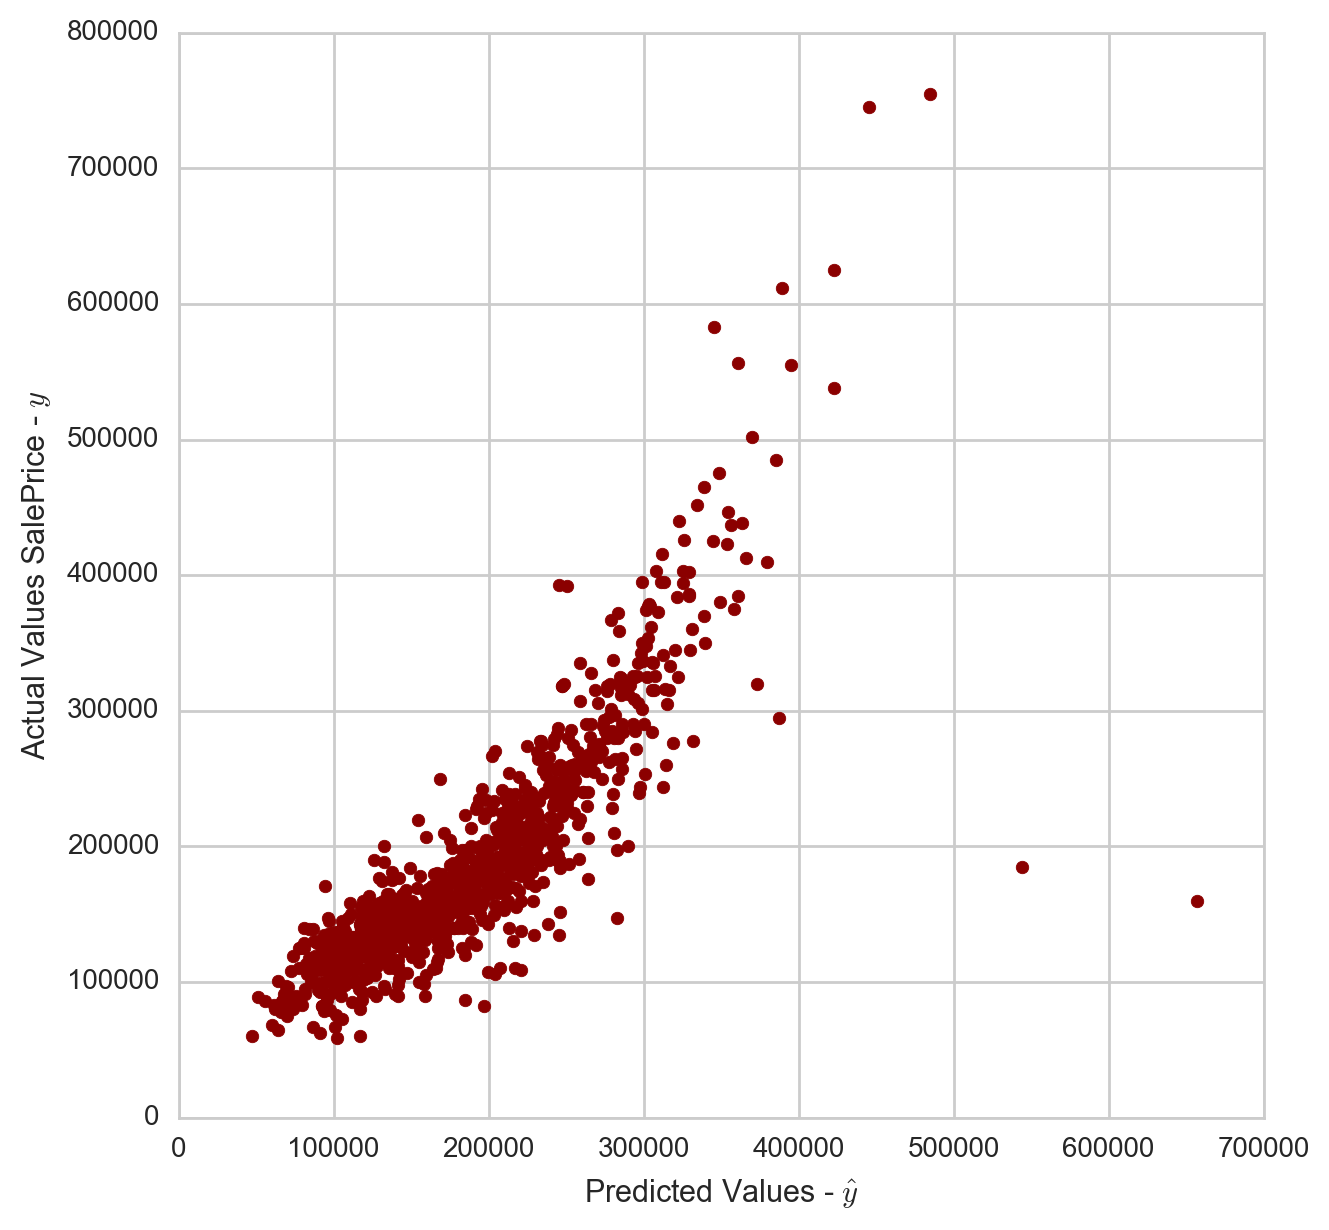

In [362]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
ax.scatter(prediction, y, color ="darkred")
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values SalePrice - $y$")


### 8.4 Plot a histogram of the residuals.

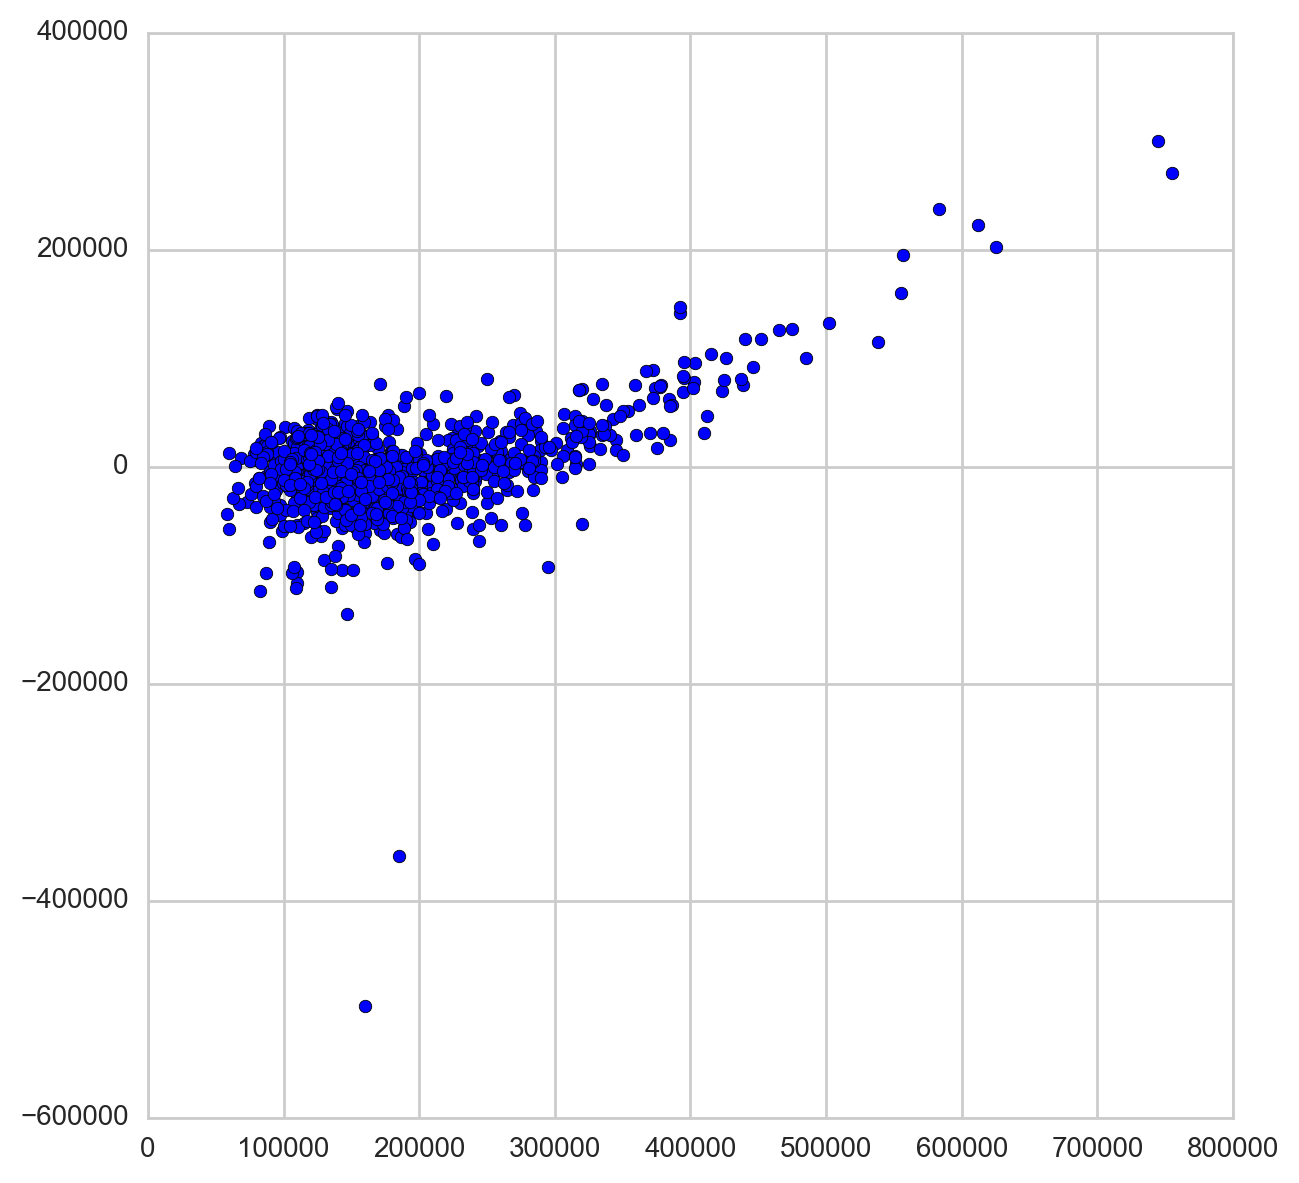

In [365]:
residual = y - prediction
plt.scatter(y, residual)

### 8.5 Make a plot to show the strength of the different coefficients.

In [ ]:
#DIDNT KNOW HOW TO DO THIS ONE

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Create a predictor matrix using all viable predictors available to you

---

You will need to dummy code the categorical variables. This is done most easily using patsy by constructing a formula string to make the matrix, but can be done with sklearn functions or manually as well. 

Recall that the `C(variable)` syntax in patsy formulas will take the column named `'variable'` and make it into dummy coded columns. You may also need to rename columns, patsy has trouble with column names that start with numbers.

Lastly, remember that you may need to convert your target `y` from a matrix to a vector (patsy outputs it as 2D rather than 1D, which skearn may have trouble with.)

In [371]:
data1 = df.iloc[:, 0:80]
data1 = data1.drop("3SsnPorch", 1)
data1= data1.drop("Alley", 1)
data1 = data1.drop("PoolQC", 1)
data1 = data1.drop("MiscFeature", 1)
data1 = data1.drop("Fence", 1)
data1 = data1.drop("FireplaceQu", 1)



In [372]:
import patsy

In [373]:
formula = 'SalePrice ~ MSSubClass+MSZoning+LotFrontage+LotArea+Street+LotShape+LandContour+Utilities+LotConfig+LandSlope+Neighborhood+Condition1+Condition2+BldgType+HouseStyle+OverallQual+OverallCond+YearBuilt+YearRemodAdd+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+MasVnrType+MasVnrArea+ExterQual+ExterCond+Foundation+BsmtQual+BsmtCond+BsmtExposure+BsmtFinType1+BsmtFinSF1+BsmtFinType2+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+Heating+HeatingQC+CentralAir+Electrical + LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+KitchenQual+TotRmsAbvGrd+Functional+Fireplaces+GarageType+GarageYrBlt+GarageFinish+GarageCars+GarageArea+GarageQual+GarageCond+PavedDrive+WoodDeckSF+OpenPorchSF+EnclosedPorch+ScreenPorch+MoSold+YrSold+SaleType+SaleCondition -1'

In [381]:
y, X =patsy.dmatrices(formula, data= data1, return_type="dataframe",NA_action="drop")
X

,MSZoning[RH],MSZoning[RL],MSZoning[RM],Street[T.Pave],LotShape[T.IR2],LotShape[T.IR3],LotShape[T.Reg],LandContour[T.HLS],LandContour[T.Low],LandContour[T.Lvl],...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,2.0,2008.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,5.0,2007.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,9.0,2008.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,2.0,2006.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,12.0,2008.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1993.0,2.0,480.0,40.0,30.0,0.0,0.0,10.0,2009.0
6,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,2004.0,2.0,636.0,255.0,57.0,0.0,0.0,8.0,2007.0
8,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2.0,1931.0,2.0,468.0,90.0,0.0,205.0,0.0,4.0,2008.0
9,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2.0,1939.0,1.0,205.0,0.0,4.0,0.0,0.0,1.0,2008.0
10,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1965.0,1.0,384.0,0.0,0.0,0.0,0.0,2.0,2008.0


In [379]:
#+PavedDrive+WoodDeckSF+OpenPorchSF+EnclosedPorch+ScreenPorch+PoolArea+PoolQC+Fence+MiscFeature+MiscVal+MoSold+YrSold+SaleType+SaleCondition+age_sold

In [382]:
y

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
5,143000.0
6,307000.0
8,129900.0
9,118000.0
10,129500.0


### 9.2 Fit a linear regression using all of the predictors and score it.

In [390]:
model = regr.fit(X,y)
predictions  = model.predict(X)
score = model.score(X,y)


print "SCORE/R^2:", model.score(X, y)


 SCORE/R^2: 0.93051271604


### 9.3 Explain why this model and associated $R^2$ score may not be as "good" as they seem.

In [388]:
print "MSE:", mean_squared_error(y, predictions)

MSE: 487452923.721


Probably the case of overfitting, and we can see our mean square

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Cross-validate the model

---

Use 20 folds and calculate the average $R^2$ of your model that has all of the predictors in it.

In [303]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(722, 215) (722, 1)
(310, 215) (310, 1)


In [307]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Perform 20-fold cross validation
scores = cross_val_score(model, X, y, cv=20)
print "Cross-validated scores:", scores.mean()

Cross-validated scores: -673265940256.0


### 10.2 What does the cross-validated average $R^2$ tell you?

Tells us that the model we create using our training data is useless for predicting when we use our testing data.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10.3 When can you have a negative $R^2$ score? Explain what it means.


You can have a negative R-squared when the line that use to predict is worse than just having a line through the mean

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Construct a Lasso regression and find the optimal regularization strength

---

Now you'll fit a Lasso regression using again the full predictor matrix. 

### 11.1 Using either `LassoCV` or `GridSearchCV` with `Lasso`, find the optimal regularization strength.

You are finding the best `alpha` to use with this data. For `LassoCV` you can use the `n_alphas` parameter to specify how many possible alphas you want the model to search over. With `GridSearchCV` you will have to give it a vector of the alphas you want to try.

Note that in both cases you will need to specify the number of cross-validation folds `cv`. 10 is generally a good number of folds. 

**Remember that you must standardize your predictor matrix when using regularization!**

In [326]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score



In [327]:
scaled_X= scaler.fit_transform(X)
scaled_y = scaler.fit_transform(y)


In [335]:
# Setup search parameters
search_parameters = {
    "alpha":  np.logspace(0, 5, 200)
}

lasso = Lasso()




### 11.2 Construct a `Lasso` model with the optimal `alpha` and cross-validate the $R^2$.

In [334]:
estimator = GridSearchCV(lasso, search_parameters)
results = estimator.fit(X, y)

print "Best Params:", results.best_params_
print "Best Score:", results.best_score_

print "Cross val scores:", cross_val_score(estimator, X, y, cv=10)

Best Params: {'alpha': 100000.0}
Best Score: 0.493549792755
Cross val scores: [ 0.60128622  0.55485121  0.59151454  0.44922666  0.53864906  0.58738363
  0.41514166  0.55535454  0.23000971  0.45292844]


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 11.3 Explain the effect of the Lasso regularization and why it can be useful.

In [ ]:
Regular regression without Lasso will put equal weight on each of the standardized variables where Lasso 

### 11.4 Print out the variables with non-zero Lasso coefficients (with the coefficient).

How many variables remain? 

Tell a (brief) story about what is important for estimating price based on the variables and their coefficients. Just pick out the things most interesting to you.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Construct a Ridge regression and find the optimal regularization strength

---

### 12.1 Create a predictor matrix of only variables related to sq. ft.

**Remember that you must standardize your predictor matrix before using Ridge regularization.**

In [ ]:
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
r_alphas = np.logspace(0, 5, 200)

# Get the coefficients for each alpha for the Ridge, using the function above
r_coefs = ridge_coefs(scaled_X, scaled_y, r_alphas)

### 12.2 Plot a correlation matrix of your predictors. Why might Ridge be useful here?

In [ ]:
#didnt know how to do this one

### 12.3 Find the optimal Ridge `alpha` using either `RidgeCV` or a combination of `GridSearchCV` and `Ridge`.



### 12.4 Compare the cross-validated $R^2$ score for a standard Linear Regression and your Ridge regression

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 13. Explain the difference between Ridge and Lasso regularization

---

- When are good scenarios to use each? What problems do they address?
- Why do they have the effects they do on coefficients?
- What is their effect on bias and variance?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 14. Gridsearch an optimal `ElasticNet` regression.

---

On the full predictor matrix, search for the optimal hyperparameters for an Elastic Net regression. Remember that the Elastic net is a mixture of the Ridge and Lasso, and has both an `alpha` parameter to regularize as well as an `l1_ratio`, which is the balance of Lasso vs. Ridge.

How does the ElasticNet compare to the Lasso on the dataset? What does the `l1_ratio` tell you about the balance of Ridge vs. Lasso in your model?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 15. Further fine-tune the model to predict price

---

Your goal is to create the model with the best predictive power.

You can use as much feature engineering and transformation of variables that you want, but please limit yourself to using the regression models we have covered in class thus far. When we cover models like Random Forests and Gradient Boosted Trees we will return to this dataset and see how they compare to the regression models.

For those that tackle this problem, you will have a chance to show what you did and compare to what your other classmates came up with during class (if you want). **Feel free to collaborate with your classmates on improving the model!**

In [ ]:
list1 = df.columns
list2 = []
for a in list1:
    list2.append(a)

b ="+".join(list2)
b
y = data1["SalePrice"]
X